In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mt
from matplotlib import rc

In [33]:
rc('font', family='AppleGothic')

In [76]:
group = pd.read_csv('서울시 체력단련장업 인허가 정보.csv', chunksize = 1000, encoding='cp949')

In [77]:
group = list(group)

In [78]:
df = pd.concat(group)

In [79]:
Seoul = df[['사업장명', '인허가일자', '인허가취소일자','휴업시작일자', '휴업종료일자', '폐업일자', '상세영업상태코드','상세영업상태명', '도로명주소', '지번주소']]
Seoul.to_csv("서울헬스장현황_가공.csv", mode = 'w', encoding = 'cp949')

In [182]:
df1 = pd.read_csv('서울헬스장현황_가공.csv', encoding='cp949')

In [183]:
df1

,Unnamed: 0,사업장명,인허가일자,인허가취소일자,휴업시작일자,휴업종료일자,폐업일자,상세영업상태코드,상세영업상태명,도로명주소,지번주소
0,0,신화헬스클럽,19930701,NaN,NaN,NaN,20040417.0,3,폐업,NaN,서울특별시 성동구 홍익동 162-1번지
1,1,성수헬스,19940127,NaN,NaN,NaN,20011106.0,3,폐업,서울특별시 성동구 아차산로7길 14-1 (성수동2가),서울특별시 성동구 성수동2가 289-243번지
2,2,유통헬스,20040729,NaN,NaN,NaN,20220421.0,3,폐업,서울특별시 영등포구 영등포로 109 (당산동2가 영등포유통상가),서울특별시 영등포구 당산동2가 30-2
3,3,J-PT,20220516,NaN,NaN,NaN,NaN,13,영업중,서울특별시 중랑구 공릉로 18 3층 (묵동),서울특별시 중랑구 묵동 174-29
4,4,메이크유 필라테스&PT,20200131,NaN,NaN,NaN,NaN,13,영업중,서울특별시 구로구 경인로 397 골든타워빌딩 4층 (고척동),서울특별시 구로구 고척동 76-160 골든타워빌딩 4층
...,...,...,...,...,...,...,...,...,...,...,...
5472,5472,크로스핏 긱스,20221020,NaN,NaN,NaN,NaN,13,영업중,서울특별시 영등포구 양평로12가길 4 지하1층 (당산동6가),서울특별시 영등포구 당산동6가 347-6 지하1층
5473,5473,짐구석,20190625,NaN,NaN,NaN,NaN,13,영업중,서울특별시 송파구 위례광장로 200 에스비트램스퀘어 10층 (장지동),서울특별시 송파구 장지동 881-5 에스비트램스퀘어
5474,5474,와이짐(Y GYM),20221021,NaN,NaN,NaN,NaN,13,영업중,서울특별시 강남구 강남대로132길 59 2층 (논현동),서울특별시 강남구 논현동 42-7
5475,5475,운동해야짐,20221027,NaN,NaN,NaN,NaN,13,영업중,서울특별시 관악구 양녕로 50 3층 (봉천동),서울특별시 관악구 봉천동 463-3


In [184]:
# df1['인허가일자'] = pd.to_datetime(df1['인허가일자'], format='%Y%m%d') 
# df1['인허가취소일자'] = pd.to_datetime(df1['인허가취소일자'], format='%Y%m%d') 
# df1['폐업일자'] = pd.to_datetime(df1['폐업일자'], format='%Y%m%d') 
# df1['휴업시작일자'] = pd.to_datetime(df1['휴업시작일자'], format='%Y%m%d') 
# df1['휴업종료일자'] = pd.to_datetime(df1['휴업종료일자'], format='%Y%m%d')


In [185]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477 entries, 0 to 5476
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5477 non-null   int64  
 1   사업장명        5477 non-null   object 
 2   인허가일자       5477 non-null   int64  
 3   인허가취소일자     4 non-null      float64
 4   휴업시작일자      5 non-null      float64
 5   휴업종료일자      5 non-null      float64
 6   폐업일자        2146 non-null   float64
 7   상세영업상태코드    5477 non-null   int64  
 8   상세영업상태명     5477 non-null   object 
 9   도로명주소       5252 non-null   object 
 10  지번주소        5405 non-null   object 
dtypes: float64(4), int64(3), object(4)
memory usage: 470.8+ KB


In [186]:
# df1['폐업,전출,휴업,취소,말소여부'] = 0

In [187]:
df1

,Unnamed: 0,사업장명,인허가일자,인허가취소일자,휴업시작일자,휴업종료일자,폐업일자,상세영업상태코드,상세영업상태명,도로명주소,지번주소
0,0,신화헬스클럽,19930701,NaN,NaN,NaN,20040417.0,3,폐업,NaN,서울특별시 성동구 홍익동 162-1번지
1,1,성수헬스,19940127,NaN,NaN,NaN,20011106.0,3,폐업,서울특별시 성동구 아차산로7길 14-1 (성수동2가),서울특별시 성동구 성수동2가 289-243번지
2,2,유통헬스,20040729,NaN,NaN,NaN,20220421.0,3,폐업,서울특별시 영등포구 영등포로 109 (당산동2가 영등포유통상가),서울특별시 영등포구 당산동2가 30-2
3,3,J-PT,20220516,NaN,NaN,NaN,NaN,13,영업중,서울특별시 중랑구 공릉로 18 3층 (묵동),서울특별시 중랑구 묵동 174-29
4,4,메이크유 필라테스&PT,20200131,NaN,NaN,NaN,NaN,13,영업중,서울특별시 구로구 경인로 397 골든타워빌딩 4층 (고척동),서울특별시 구로구 고척동 76-160 골든타워빌딩 4층
...,...,...,...,...,...,...,...,...,...,...,...
5472,5472,크로스핏 긱스,20221020,NaN,NaN,NaN,NaN,13,영업중,서울특별시 영등포구 양평로12가길 4 지하1층 (당산동6가),서울특별시 영등포구 당산동6가 347-6 지하1층
5473,5473,짐구석,20190625,NaN,NaN,NaN,NaN,13,영업중,서울특별시 송파구 위례광장로 200 에스비트램스퀘어 10층 (장지동),서울특별시 송파구 장지동 881-5 에스비트램스퀘어
5474,5474,와이짐(Y GYM),20221021,NaN,NaN,NaN,NaN,13,영업중,서울특별시 강남구 강남대로132길 59 2층 (논현동),서울특별시 강남구 논현동 42-7
5475,5475,운동해야짐,20221027,NaN,NaN,NaN,NaN,13,영업중,서울특별시 관악구 양녕로 50 3층 (봉천동),서울특별시 관악구 봉천동 463-3


In [188]:
df1['폐업,전출,휴업,취소,말소여부'] = np.where(df1['인허가취소일자'].notnull() | df1['휴업시작일자'].notnull() | df1['폐업일자'].notnull(), 1, 0)

In [189]:
# df1['폐업,전출,휴업,취소,말소연도'] = df1.max(axis = 1, numeric_only = True)

In [190]:
df1.loc[:, '폐업,전출,휴업,취소,말소연도'] = df1.loc[:, ['인허가취소일자', '폐업일자', '휴업시작일자']].max(axis=1)

In [191]:
df1['인허가일자'] = pd.to_datetime(df1['인허가일자'], format='%Y%m%d') 
df1['인허가취소일자'] = pd.to_datetime(df1['인허가취소일자'], format='%Y%m%d') 
df1['폐업일자'] = pd.to_datetime(df1['폐업일자'], format='%Y%m%d') 
df1['휴업시작일자'] = pd.to_datetime(df1['휴업시작일자'], format='%Y%m%d') 
df1['휴업종료일자'] = pd.to_datetime(df1['휴업종료일자'], format='%Y%m%d')
df1['폐업,전출,휴업,취소,말소연도'] = pd.to_datetime(df1['폐업,전출,휴업,취소,말소연도'], format='%Y%m%d')


In [194]:
df1.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [195]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477 entries, 0 to 5476
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   사업장명              5477 non-null   object        
 1   인허가일자             5477 non-null   datetime64[ns]
 2   인허가취소일자           4 non-null      datetime64[ns]
 3   휴업시작일자            5 non-null      datetime64[ns]
 4   휴업종료일자            5 non-null      datetime64[ns]
 5   폐업일자              2146 non-null   datetime64[ns]
 6   상세영업상태코드          5477 non-null   int64         
 7   상세영업상태명           5477 non-null   object        
 8   도로명주소             5252 non-null   object        
 9   지번주소              5405 non-null   object        
 10  폐업,전출,휴업,취소,말소여부  5477 non-null   int64         
 11  폐업,전출,휴업,취소,말소연도  2155 non-null   datetime64[ns]
dtypes: datetime64[ns](6), int64(2), object(4)
memory usage: 513.6+ KB


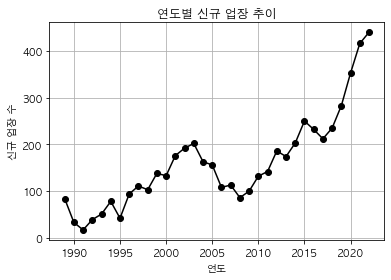

In [196]:
plt.title('연도별 신규 업장 추이')
df1.groupby(df1['인허가일자'].dt.year)['인허가일자'].count().plot(c = 'k', marker = 'o')
plt.xlabel("연도")
plt.ylabel("신규 업장 수")
plt.grid(True)
plt.show()

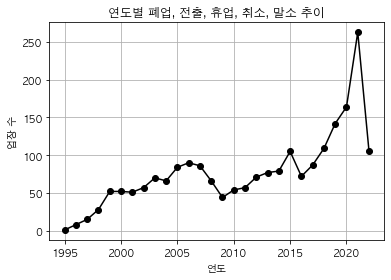

In [197]:
plt.title('연도별 폐업, 전출, 휴업, 취소, 말소 추이')
df1.groupby(df1['폐업,전출,휴업,취소,말소연도'].dt.year)['폐업,전출,휴업,취소,말소여부'].sum().plot(c = 'k', marker = 'o')
plt.xlabel("연도")
plt.ylabel("업장 수")
plt.grid(True)
plt.show()